In [0]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import erf
from scipy.optimize import curve_fit, dual_annealing

In [0]:
Data={'India':[29,30,31,34,40,47,62,62,74,82,100,114,129,143,169,194,249,332,396,499,536,657,727,887,987,1024,1251,1397,1998,2543,3059,3588,4289,4778,5351,5916,6725,7600,8446,
               9205,10453],
      'Bangladesh':[3,5,5,8,10,14,18,20,24,27,33,39,39,44,48,48,48,49,51,54,56,61,70,88,123,164,218,330,424,482,621,803],
      'Delhi':[7,7,7,8,10,14,20,27,27,30,30,35,36,40,49,72,97,120,152,293,386,445,503,525,576,669,720,903,1069,1154,1510],
      'West Bengal':[1,2,4,7,7,9,9,10,15,18,21,22,37,37,53,53,53,80,80,91,99,103,116,126,134,152],
      'Bihar':[2,3,3,4,7,9,11,15,15,21,24,29,31,32,32,32,38,39,58,60,64,64,66]
      }

Doubles rate:
Delhi -  4.3 days
West Bengal -  5.9 days
Bihar -  6.5 days
Bangladesh -  2.9 days


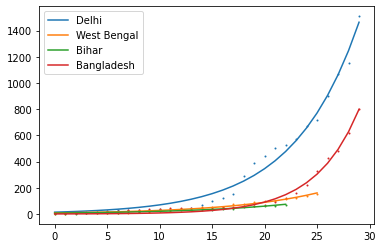

In [0]:
def f(x,A,M):
  return A*np.exp(M*x)

print("Doubles rate:")
for key in ['Delhi','West Bengal','Bihar','Bangladesh']:
  y=Data[key][-30:]
  x=np.arange(len(y))
  #x=x+30-len(x)
  popt,pcov=curve_fit(f,x,y)
  print(key,'- ',round(np.log(2)/popt[1],1),"days")
  plt.scatter(x,y,s=1)
  plt.plot(x,f(x,popt[0],popt[1]),label=key)
plt.legend()
plt.show()

In [0]:
def plot(param,x,y,key):
  x_new=np.arange(len(y)+30)
  n=len(param)//3
  res=0
  sat=0
  for i in range(n):
    [a,b,c]=param[3*i:3*(i+1)]
    sat+=c
    res+=c*(erf(b*(x_new-a))+1)
  
  print("Saturation: ",2*int(sat))
  '''
  plt.title(key)
  plt.ylabel("Cumulative Coronavirus Cases")
  plt.xlabel("Number of Days")
  plt.scatter(x,y)
  plt.semilogy(x_new[10:],res[10:],c='r')
  plt.show()

  plt.title(key)
  plt.ylabel("Cumulative Coronavirus Cases")
  plt.xlabel("Number of Days")
  plt.scatter(x,y)
  x_new=np.arange(10,n+30)
  plt.plot(x_new,res,c='r')
  plt.show()
  '''

  plt.title(key)
  plt.ylabel('Daily Coronavirus Cases')
  plt.xlabel("Number of Days")
  plt.scatter(x[1:],y[1:]-y[:-1])
  plt.plot(x_new[1:],res[1:]-res[:-1],c='r')
  plt.show()

In [0]:
def f1(x,a,b,c):
  return c*(erf(b*(x-a))+1)
def f2(x,a1,b1,c1,a2,b2,c2):
  return c1*(erf(b1*(x-a1))+1)+c2*(erf(b2*(x-a2))+1)
def f3(x,a1,b1,c1,a2,b2,c2,a3,b3,c3):
  return c1*(erf(b1*(x-a1))+1)+c2*(erf(b2*(x-a2))+1)+c3*(erf(b3*(x-a3))+1)

Saturation:  28010


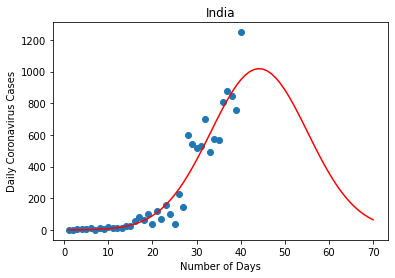

In [0]:
for key in ['India']:
  y=np.array(Data[key])
  x=np.arange(len(y))
  
  try: popt,pcov=curve_fit(f1,x,y)
  except: continue

  plot(popt,x,y,key)

In [0]:
for key in []:
  y=np.array(Data[key])
  x=np.arange(len(y))
  
  try: popt,pcov=curve_fit(f2,x,y)
  except: continue

  plot(popt,x,y,key)